# <center> <b> <h1>   6. Permutation Test </h1></b></center>

In [26]:
import pickle

import pandas as pd
import itertools

import matplotlib.pyplot as plt
from sklearn.model_selection import permutation_test_score
import joblib

PATH_DATASETS = "../2_Data_preparation/2_Split_Raw_Datasets/output/"
PATH_SVM_CLFS_LINEAR = "../4. Modeling_SVM/3. SVM support - 1 - optimal/output/"
PATH_SVM_CLFS_RBF = "../4. Modeling_SVM/5 SVM Non Linear - Optimal/output/"
PATH_SVM_CLFS_POLY = "../4. Modeling_SVM/7. SVM Poly - Optimal/output/"
PATH_RANKINGS_SVM = "../4. Modeling_SVM/1. SVM RFE (All features)/csv/"

In [27]:
def readCsvs(split):
    datasets = []
    constant1 = 'X_'
    constant2 = '_' + split
    features = ['area', 'meancurv', 'thickness', 'volume']

    for feature in features:
        df = pd.read_csv(PATH_DATASETS + constant1 + feature + constant2 +'.csv', index_col=0)
        datasets.append({'name': feature, 'data': df})
    return datasets

In [28]:
def readClf(string = 'lineal'):
    clfs = []
    features = ['area', 'meancurv', 'thickness', 'volume']
    
    if string == 'lineal':  
        constant = "SVM (Support - 1 - optimal)"
        PATH = PATH_SVM_CLFS_LINEAR
    elif string == 'rbf':
        constant = "SVM Non Linear - Optimal - "
        PATH = PATH_SVM_CLFS_RBF
    else:
        constant = "SVM Non Linear Poly - Optimal - "
        PATH = PATH_SVM_CLFS_POLY
    
    for feature in features:
        clf = joblib.load(PATH + constant + feature + '.pkl')
        clfs.append({'name': feature, 'data': clf})
        
    return clfs

In [29]:
def readRankings(ranking = 0):
    datasets = []
    constants = ['used_regions_normalized_convergence_',
                 'used_regions_normalized_highest_']    
    
    features = ['area', 'meancurv', 'thickness', 'volume']

    for feature in features:
        df = pd.read_csv(PATH_RANKINGS_SVM + constants[ranking] + feature +'.csv', index_col=0)
        datasets.append({'name': feature, 'data': df})
    return datasets

# 1. Data Preparing

In [30]:
df_X_tr = readCsvs('train')
df_X_tr[2]['data'].shape

(550, 148)

In [31]:
df_y_train = pd.read_csv(PATH_DATASETS + 'Y_train.csv', index_col = 0)
df_y_train.shape

(550, 1)

# 2. Normalize the data

In [32]:
for df_tr in df_X_tr:
    train = df_tr['data']
    normal_tr = (train - train.mean(axis=0))/train.std()
    df_tr['data'] = normal_tr

In [33]:
df_X_tr[0]['data'].head()

,lh_G_and_S_frontomargin_area,lh_G_and_S_occipital_inf_area,lh_G_and_S_paracentral_area,lh_G_and_S_subcentral_area,lh_G_and_S_transv_frontopol_area,lh_G_and_S_cingul-Ant_area,lh_G_and_S_cingul-Mid-Ant_area,lh_G_and_S_cingul-Mid-Post_area,lh_G_cingul-Post-dorsal_area,lh_G_cingul-Post-ventral_area,...,rh_S_parieto_occipital_area,rh_S_pericallosal_area,rh_S_postcentral_area,rh_S_precentral-inf-part_area,rh_S_precentral-sup-part_area,rh_S_suborbital_area,rh_S_subparietal_area,rh_S_temporal_inf_area,rh_S_temporal_sup_area,rh_S_temporal_transverse_area
414229,0.309576,0.224009,1.107822,1.264846,-0.053643,0.447702,0.977805,0.781809,-0.594180,-0.761092,...,0.221416,0.381852,-0.114597,1.444931,0.064915,-0.435619,-1.510187,-0.718114,-1.077114,-0.575371
541943,-0.076249,0.352958,-0.262869,0.412671,-0.728809,-0.994397,-0.892543,-0.132296,-1.093925,-0.695517,...,0.137165,3.971853,-0.980071,-0.602848,-1.391463,1.763449,-0.070073,1.569996,-1.101390,-0.732631
206525,1.821379,1.235757,0.221342,1.378470,0.139262,2.154329,0.479456,0.281038,-0.560107,1.577744,...,2.151850,1.750859,1.175570,-0.649815,1.331331,1.466642,1.690066,1.386581,2.638980,0.660251
146533,1.656025,0.933225,1.614382,-0.344818,0.310732,2.457255,1.002415,0.519500,-0.491960,0.054950,...,1.305682,0.006832,0.956788,-0.161354,2.071697,-0.044374,-0.431244,-0.846505,1.292596,-1.024687
194746,-0.918764,0.273605,-0.657688,-0.067072,-0.621640,-0.772536,-0.486481,0.137961,-0.491960,-0.476934,...,0.016284,0.451031,-0.143553,-0.969194,-0.388072,-1.069706,-0.536396,0.079744,-0.490755,-0.081122


# Read Rankings

In [34]:
#0 for normalized convergence and 1 for normalized highest accuracy
ranking_svm = readRankings()
ranking_svm[0]['data'].head()

,Ranking,Support
Name,,
lh_G_and_S_frontomargin_area,1,True
rh_S_orbital-H_Shaped_area,1,True
lh_S_circular_insula_sup_area,1,True
lh_S_collat_transv_ant_area,1,True
rh_S_collat_transv_post_area,1,True


# Read CLFS

In [35]:
clfs_svm_lienar = readClf('lienar')
clfs_svm_rbf = readClf('rbf')
clfs_svm_poly = readClf('poly')

# permutation test with the correct number of area

In [36]:
def p_test_with_graph(X, y, clf, n_permutations = 10000, cv = 5):
    
    score, permutation_scores, pvalue = permutation_test_score(
        clf, X, y, scoring="accuracy", cv=cv, n_permutations=n_permutations, n_jobs=-1)

    print("Classification score %s (pvalue : %s)" % (score, pvalue))

    # #############################################################################
    # View histogram of permutation scores
    plt.hist(permutation_scores, 40, label='Permutation scores',
             edgecolor='black')
    ylim = plt.ylim()
    plt.plot(2 * [score], ylim, '--g', linewidth=3,
             label='Classification Score'
             ' (pvalue %s)' % pvalue)
    plt.plot(2 * [1. / 2], ylim, '--k', linewidth=3, label='Luck')

    plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Score')
    plt.show()

******** Permutation test SVM kernel Linear: area********

Classification score 0.7072727272727273 (pvalue : 9.999000099990002e-05)


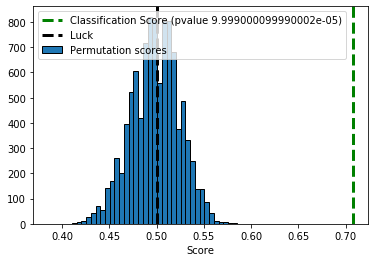

******** Permutation test SVM kernel Linear: meancurv********

Classification score 0.6163636363636364 (pvalue : 9.999000099990002e-05)


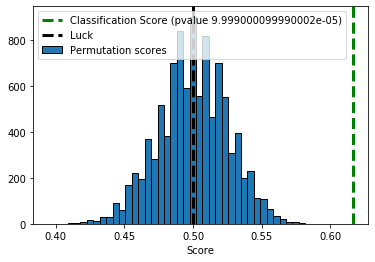

******** Permutation test SVM kernel Linear: thickness********

Classification score 0.5890909090909091 (pvalue : 0.00019998000199980003)


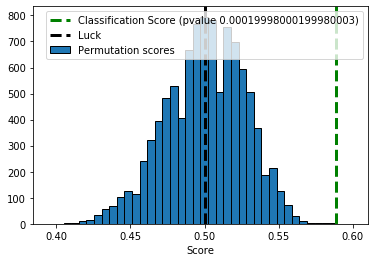

******** Permutation test SVM kernel Linear: volume********

Classification score 0.6945454545454546 (pvalue : 9.999000099990002e-05)


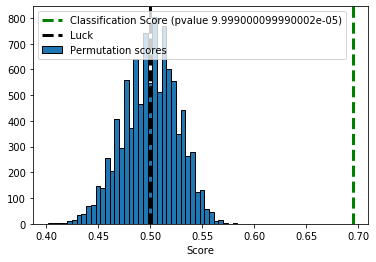

In [38]:
for feature, clf_svm, feature_list, in zip(df_X_tr, clfs_svm_lienar, ranking_svm):
    
    data = feature['data']
    name = feature['name']
    
    svm = clf_svm['data']
    
    print("******** Permutation test SVM kernel Linear: " + name+ "********" + '\n')
    p_test_with_graph(data[feature_list['data'].index.values].copy(), df_y_train['class'].values, svm)
    
    

******** Permutation test SVM kernel RBF: area********

Classification score 0.7363636363636363 (pvalue : 9.999000099990002e-05)


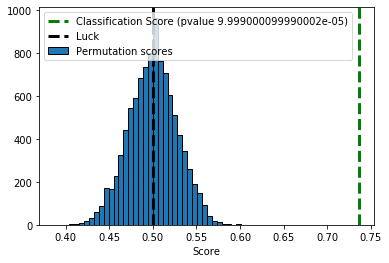

******** Permutation test SVM kernel RBF: meancurv********

Classification score 0.7181818181818181 (pvalue : 9.999000099990002e-05)


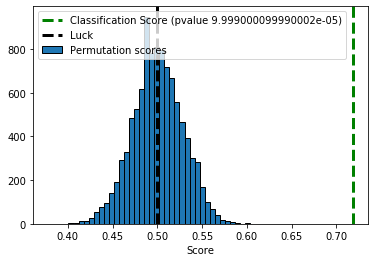

******** Permutation test SVM kernel RBF: thickness********

Classification score 0.7018181818181819 (pvalue : 9.999000099990002e-05)


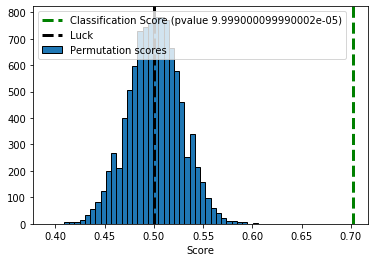

******** Permutation test SVM kernel RBF: volume********

Classification score 0.7454545454545455 (pvalue : 9.999000099990002e-05)


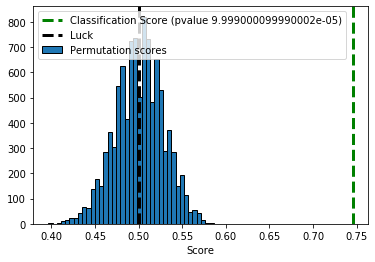

In [40]:
for feature, clf_svm, feature_list, in zip(df_X_tr, clfs_svm_rbf, ranking_svm):
    
    data = feature['data']
    name = feature['name']
    
    svm = clf_svm['data']
    
    print("******** Permutation test SVM kernel RBF: " + name+ "********" + '\n')
    p_test_with_graph(data[feature_list['data'].index.values].copy(), df_y_train['class'].values, svm)
    
    

******** Permutation test SVM kernel Poly: area********

Classification score 0.7072727272727273 (pvalue : 9.999000099990002e-05)


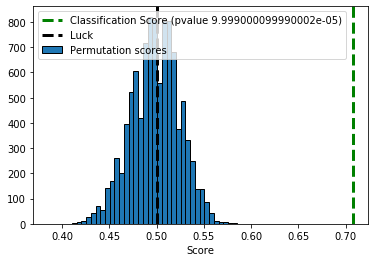

******** Permutation test SVM kernel Poly: meancurv********

Classification score 0.6163636363636364 (pvalue : 9.999000099990002e-05)


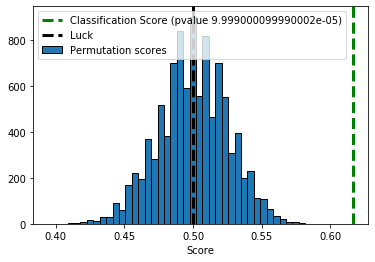

******** Permutation test SVM kernel Poly: thickness********

Classification score 0.5890909090909091 (pvalue : 0.00019998000199980003)


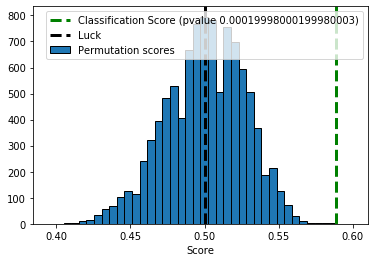

******** Permutation test SVM kernel Poly: volume********

Classification score 0.6945454545454546 (pvalue : 9.999000099990002e-05)


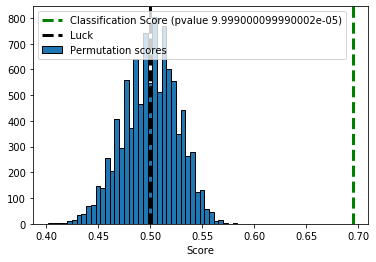

In [41]:
for feature, clf_svm, feature_list, in zip(df_X_tr, clfs_svm_poly, ranking_svm):
    
    data = feature['data']
    name = feature['name']
    
    svm = clf_svm['data']
    
    print("******** Permutation test SVM kernel Poly: " + name+ "********" + '\n')
    p_test_with_graph(data[feature_list['data'].index.values].copy(), df_y_train['class'].values, svm)
    
  